In [1]:
import seaborn as sb
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt

# Analyzing the Impact of Recession on Automobile Sales

You have been hired by XYZAutomotives as a data scientist. Your first task is to analyze the historical data and give the company directors insights on how the sales were affected during times of recession. You will provide a number of charts/plots to visualize the data and make it easy for the directors to understand your analysis.

# Objectives


- Create informative and visually appealing plots with Matplotlib and Seaborn.
- Apply visualization to communicate insights from the data.
- Analyze data through using visualizations.
- Customize visualizations


# Scenario


recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.


In [2]:
df=pd.read_csv('historical_automobile_sales.csv')

In [3]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [4]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

In [5]:
df.shape

(528, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     528 non-null    object 
 1   Year                     528 non-null    int64  
 2   Month                    528 non-null    object 
 3   Recession                528 non-null    int64  
 4   Consumer_Confidence      528 non-null    float64
 5   Seasonality_Weight       528 non-null    float64
 6   Price                    528 non-null    float64
 7   Advertising_Expenditure  528 non-null    int64  
 8   Competition              528 non-null    int64  
 9   GDP                      528 non-null    float64
 10  Growth_Rate              528 non-null    float64
 11  unemployment_rate        528 non-null    float64
 12  Automobile_Sales         528 non-null    float64
 13  Vehicle_Type             528 non-null    object 
 14  City                     5

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,528.0,2001.500000,12.710467,1980.000000,1990.750000,2001.500000,2012.250000,2023.000000
Recession,528.0,0.214015,0.410526,0.000000,0.000000,0.000000,0.000000,1.000000
Consumer_Confidence,528.0,101.140170,10.601154,73.900000,94.035000,100.740000,108.240000,131.670000
Seasonality_Weight,528.0,0.575795,0.454477,0.000000,0.250000,0.500000,0.750000,1.500000
Price,528.0,24964.991956,4888.073433,8793.663000,21453.300500,25038.691500,28131.684750,44263.657000
Advertising_Expenditure,528.0,3067.456439,1139.564637,1009.000000,2083.500000,3072.000000,4067.250000,4983.000000
Competition,528.0,6.064394,1.968350,3.000000,4.000000,6.000000,8.000000,9.000000
GDP,528.0,40.073903,16.249714,12.508000,27.237500,39.214500,53.506500,70.374000
Growth_Rate,528.0,-0.242001,0.861268,-4.227601,-0.574049,-0.013162,0.388932,0.815074
unemployment_rate,528.0,2.453977,1.119019,1.000000,1.600000,2.300000,2.900000,6.000000


In [8]:
df.Year.unique()

array([1980, 1981, 1982, 1983, 1990, 1991, 1992, 2000, 2001, 2002, 2008,
       2009, 2020, 1984, 1985, 1986, 1987, 1988, 1989, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2003, 2004, 2005, 2006, 2007, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023],
      dtype=int64)

In [9]:
df.Vehicle_Type.unique()

array(['Supperminicar', 'Mediumfamilycar', 'Smallfamiliycar', 'Sports',
       'Executivecar'], dtype=object)

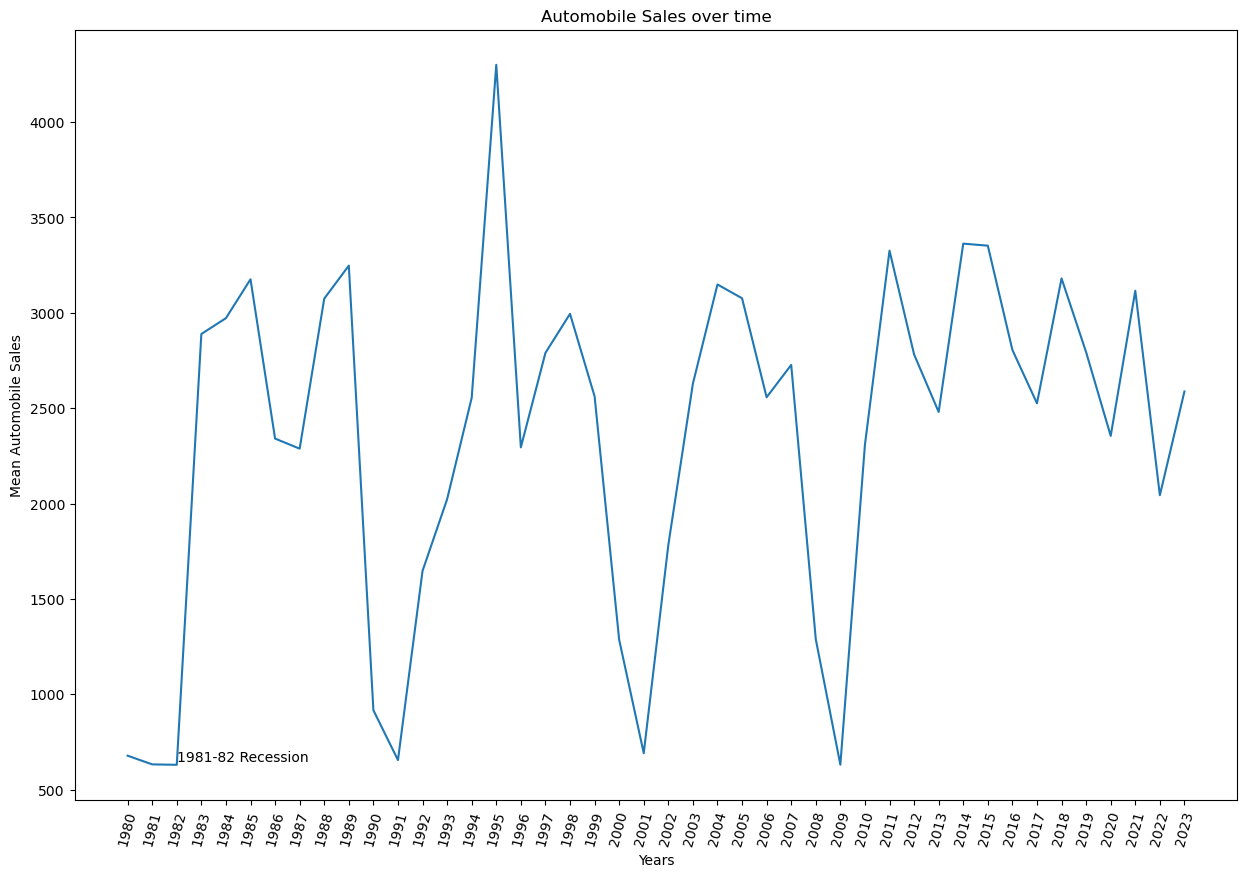

In [10]:
df_sales = df.groupby('Year')['Automobile_Sales'].mean()
plt.figure(figsize=(15,10))
df_sales.plot(kind='line')
plt.xlabel('Years')
plt.ylabel('Mean Automobile Sales')
plt.title('Automobile Sales over time')
plt.text(1982, 650, '1981-82 Recession')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.show()

In [11]:
df.groupby('Vehicle_Type')['Automobile_Sales'].sum()

Vehicle_Type
Executivecar       185928.10
Mediumfamilycar    398049.84
Smallfamiliycar    260155.00
Sports             265378.90
Supperminicar      132723.30
Name: Automobile_Sales, dtype: float64

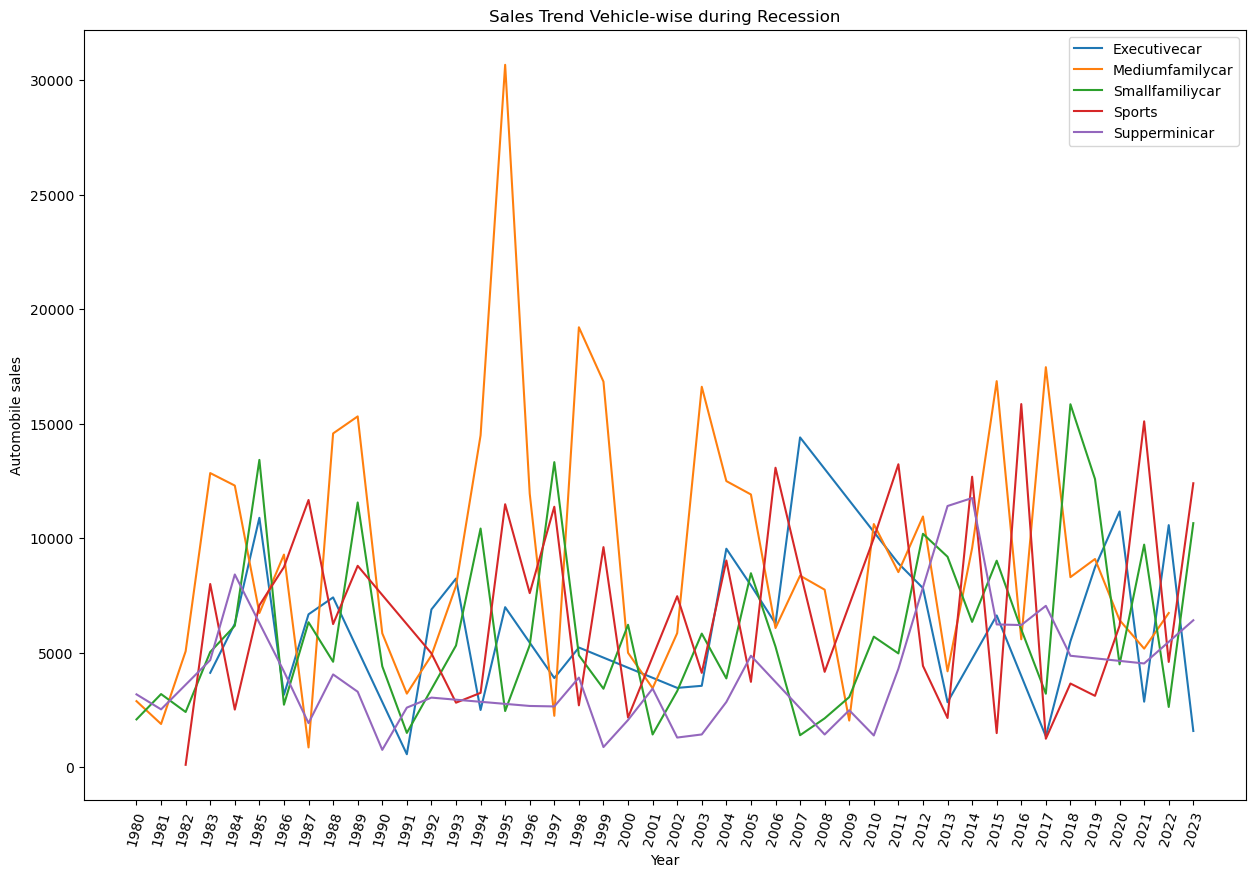

In [12]:
df_veh = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_veh.set_index('Year', inplace=True)
df_veh = df_veh.groupby(['Vehicle_Type'])['Automobile_Sales']
plt.figure(figsize=(15,10))
df_veh.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Automobile sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.legend()
plt.show()

In [13]:
data=df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

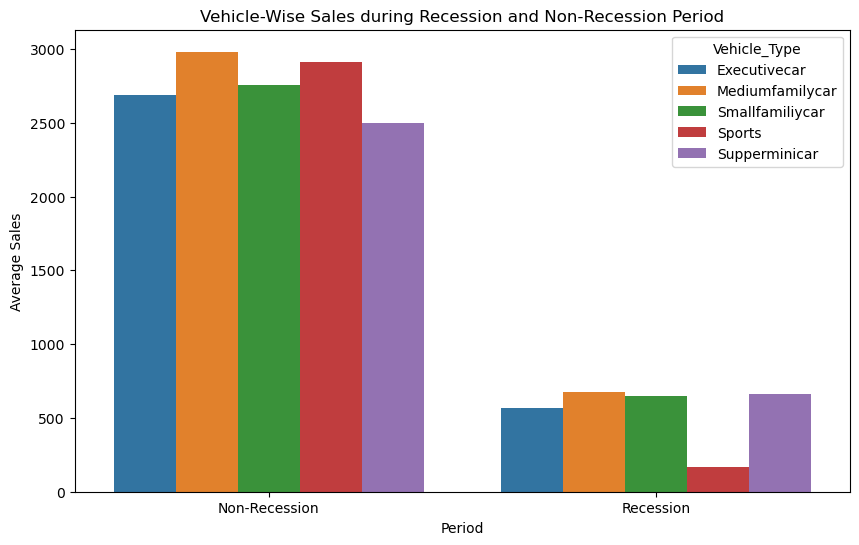

In [14]:
plt.figure(figsize=(10, 6))
sb.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=data)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')
plt.ylabel('Average Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.show()

From this plot, we can understand that there is a drastic decline in the overall sales of the automobiles during recession.
However, the most affected type of vehicle is executivecar and sports

In [15]:
recession =df[df['Recession']==1]
non_recession =df[df['Recession']==0]

In [16]:
recession

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,12/31/2009,2009,Dec,1,94.83,0.25,20863.845,1832,8,37.003,-0.459719,5.0,594.5,Smallfamiliycar,Illinois
109,9/30/2020,2020,Sep,1,111.62,0.07,33435.708,2622,8,17.046,-1.170773,3.7,692.8,Mediumfamilycar,Illinois
110,10/31/2020,2020,Oct,1,84.48,0.00,29408.199,4700,4,53.028,0.678547,3.6,214.0,Sports,California
111,11/30/2020,2020,Nov,1,112.39,0.07,24960.137,4945,8,24.367,-1.176222,4.2,597.1,Mediumfamilycar,New York


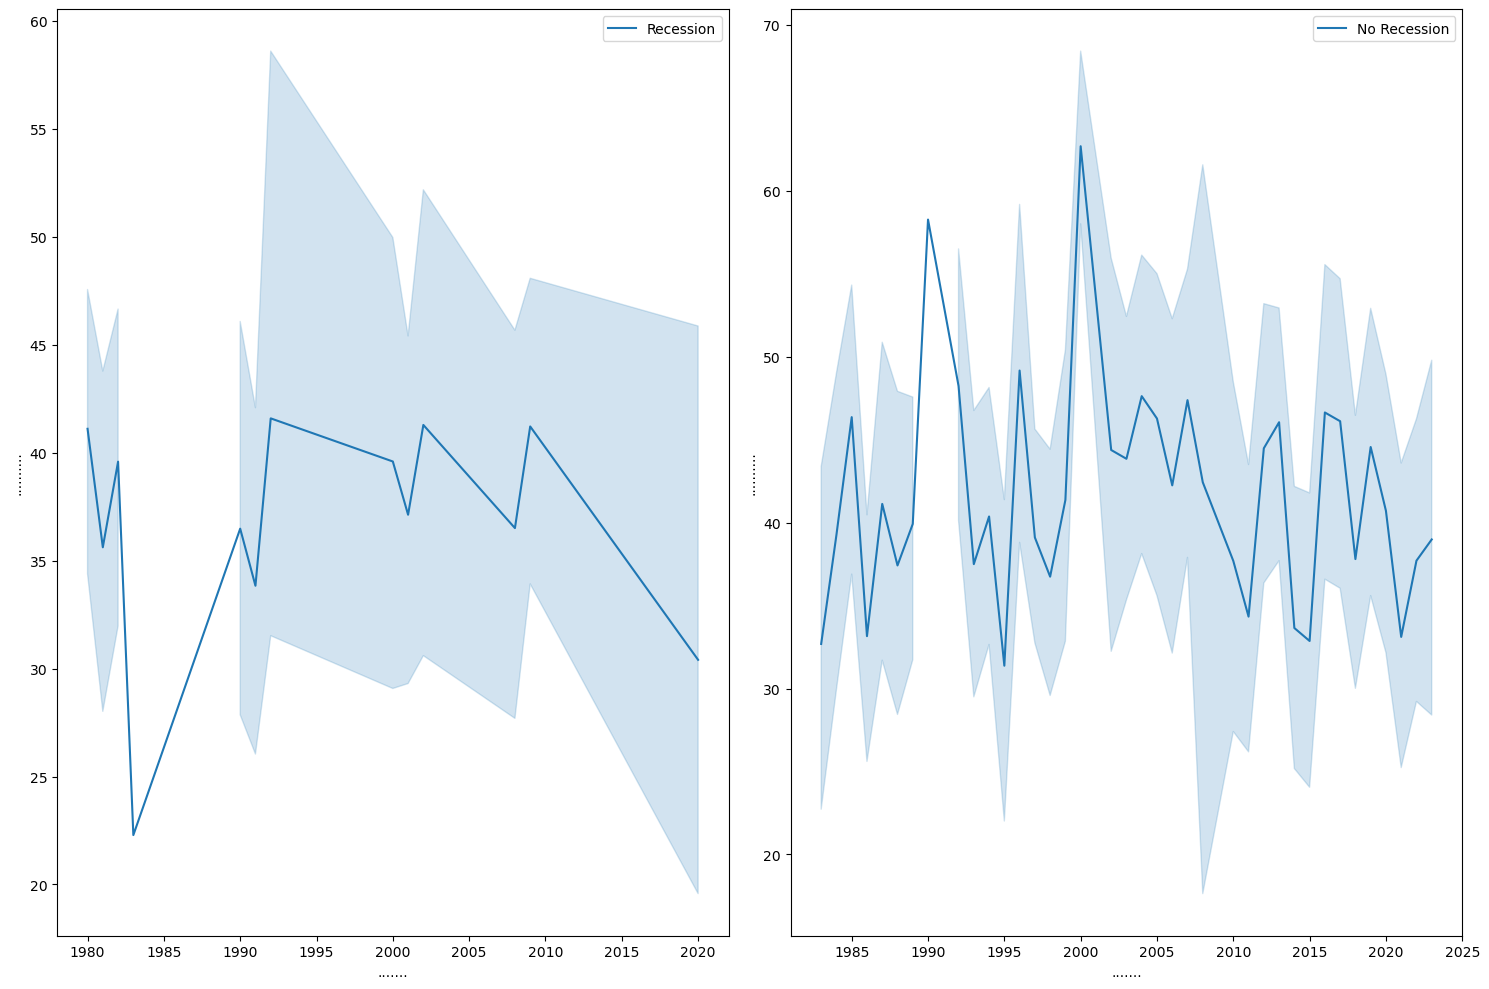

In [17]:
plt.figure(figsize=(15, 10))
    
#subplot 1
plt.subplot(1, 2, 1)
sb.lineplot(x='Year', y='GDP', data=recession, label='Recession')
plt.xlabel('.......')
plt.ylabel('..........')
plt.legend()

#subplot 1
plt.subplot(1, 2, 2)
sb.lineplot(x='Year', y='GDP', data=non_recession, label='No Recession')
plt.xlabel('.......')
plt.ylabel('..........')
plt.legend()
    
plt.tight_layout()
plt.show()

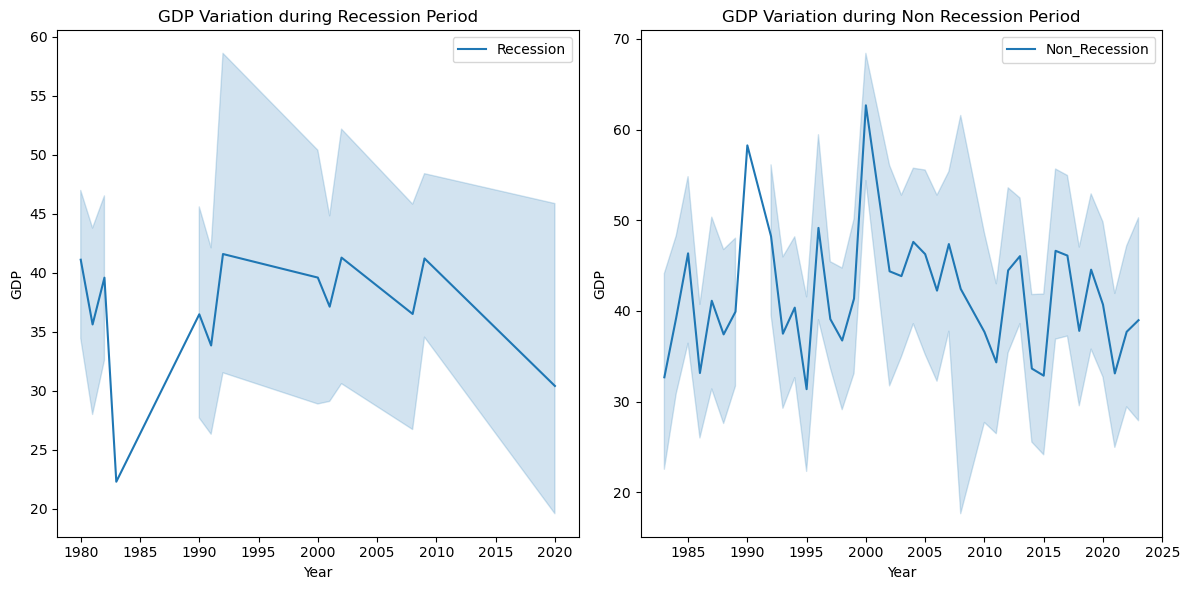

In [18]:
  #Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]
    
#Figure
fig=plt.figure(figsize=(12, 6))
    
#Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1 ,2 ,2 ) # add subplot 2 (1 row, 2 columns, second plot). 
    
#plt.subplot(1, 2, 1)
sb.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')
    
#plt.subplot(1, 2, 2)
sb.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non_Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non Recession Period')
    
plt.tight_layout()
plt.show()

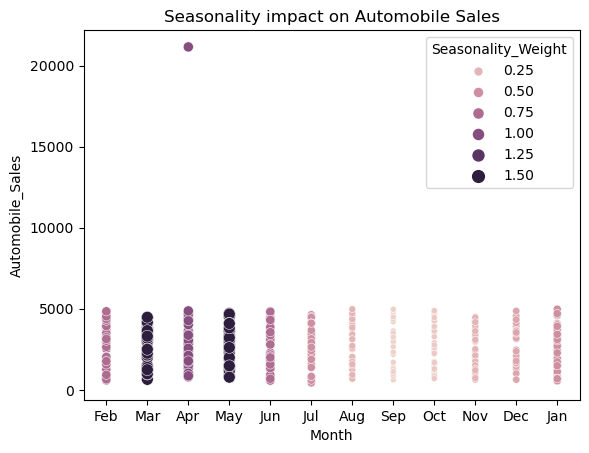

In [19]:
size=non_rec_data['Seasonality_Weight'] #for bubble effect
    
sb.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, hue='Seasonality_Weight')
    
    #you can further include hue='Seasonality_Weight', legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

Text(0.5, 1.0, 'Relationship between vehicle price and sales volume')

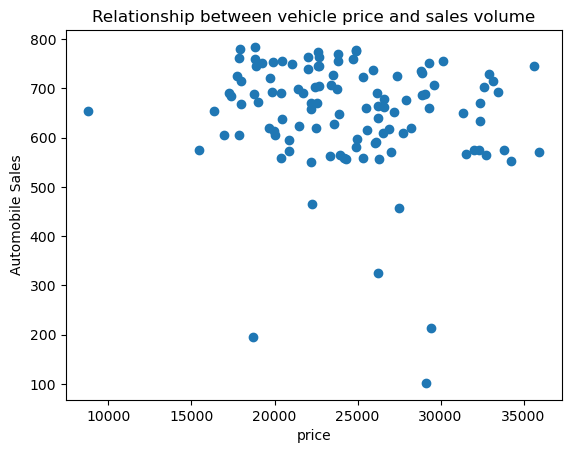

In [24]:
plt.scatter(data=rec_data, x= 'Price', y='Automobile_Sales')
plt.ylabel('Automobile Sales')
plt.xlabel('price')
plt.title('Relationship between vehicle price and sales volume')

- There is not much relationship between them

In [25]:
rec_data

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,12/31/2009,2009,Dec,1,94.83,0.25,20863.845,1832,8,37.003,-0.459719,5.0,594.5,Smallfamiliycar,Illinois
109,9/30/2020,2020,Sep,1,111.62,0.07,33435.708,2622,8,17.046,-1.170773,3.7,692.8,Mediumfamilycar,Illinois
110,10/31/2020,2020,Oct,1,84.48,0.00,29408.199,4700,4,53.028,0.678547,3.6,214.0,Sports,California
111,11/30/2020,2020,Nov,1,112.39,0.07,24960.137,4945,8,24.367,-1.176222,4.2,597.1,Mediumfamilycar,New York


In [26]:
non_rec_data

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
113,2/28/1983,1983,Feb,0,126.06,0.75,15201.649,4621,4,12.819,-1.119666,2.4,3799.1,Sports,Georgia
114,3/31/1983,1983,Mar,0,92.67,1.50,18359.070,3038,8,12.945,0.009733,1.5,3533.5,Smallfamiliycar,California
115,4/30/1983,1983,Apr,0,96.39,1.00,25984.306,4490,8,25.206,0.486432,2.0,3240.4,Supperminicar,Illinois
116,5/31/1983,1983,May,0,91.81,1.50,28692.333,4677,8,14.630,-0.722898,2.3,908.1,Smallfamiliycar,California
117,6/30/1983,1983,Jun,0,106.16,0.75,25856.841,2118,5,18.765,0.220357,2.3,4769.8,Mediumfamilycar,Illinois
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia


In [34]:
adv_rec= rec_data['Advertising_Expenditure'].sum()
adv_non=non_rec_data['Advertising_Expenditure'].sum()
size= [adv_rec, adv_non]
label=['Recession', 'Non_recession']

Text(0.5, 1.0, 'Advertizing Expenditure during Recession and Non Recession period')

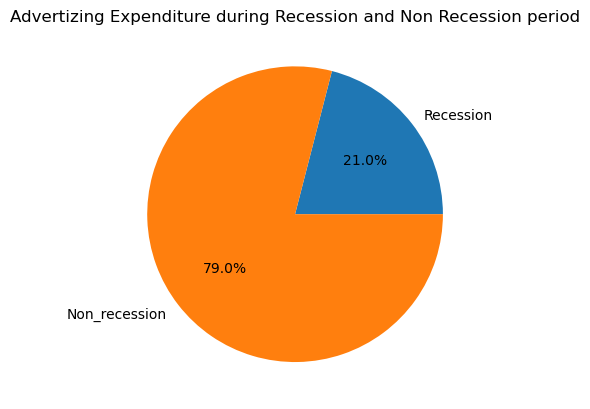

In [42]:
plt.pie(x=size, labels=label,autopct='%1.1f%%' )
plt.title('Advertizing Expenditure during Recession and Non Recession period')

- The company spend more on advertisement during the non recession period than the recession period which is fair enough.

In [43]:
df

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia


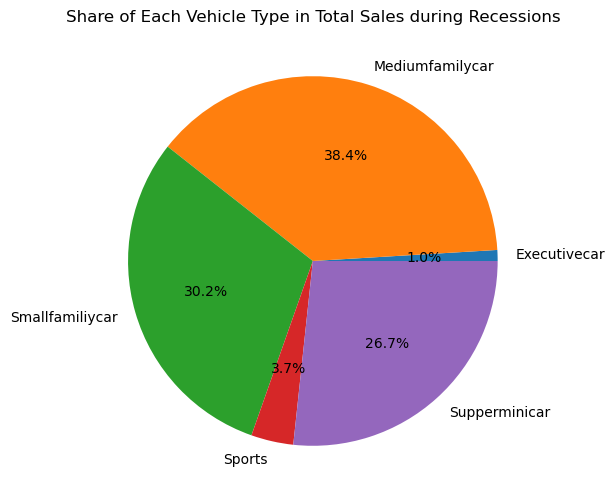

In [56]:
adv_value=rec_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
size=adv_value.values
label= adv_value.index
plt.figure(figsize=((10,6)))
plt.pie(x=size, labels=label, autopct='%1.1f%%')
plt.title('Share of Each Vehicle Type in Total Sales during Recessions')
plt.show()

In [74]:
df.groupby('Vehicle_Type')['Automobile_Sales'].mean()

Vehicle_Type
Executivecar       2656.115714
Mediumfamilycar    2397.890602
Smallfamiliycar    2132.418033
Sports             2823.179787
Supperminicar      1746.359211
Name: Automobile_Sales, dtype: float64

- Advertisement were focused on vehicle with lower prices which is wise aenough

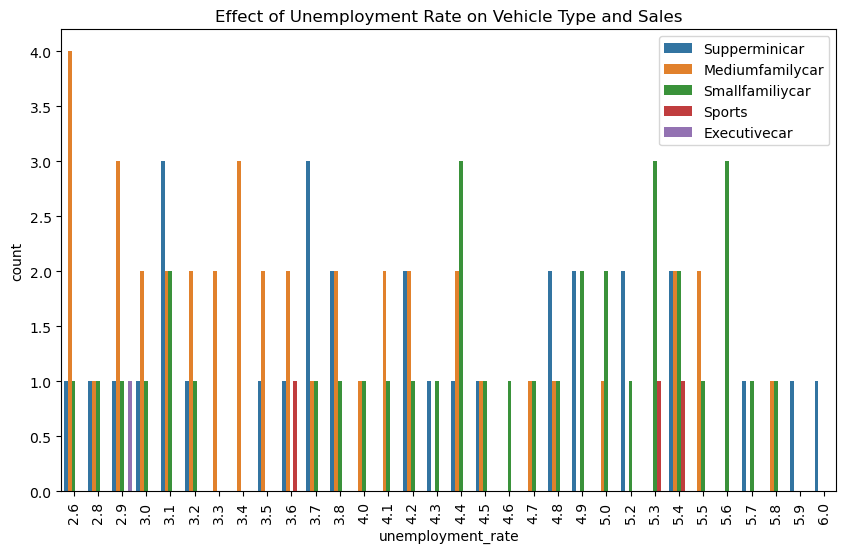

In [82]:
plt.figure(figsize=(10,6))
sb.countplot(data=rec_data, x='unemployment_rate', hue='Vehicle_Type')
plt.xticks(rotation=90)
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(loc='upper right')
plt.show()

In [86]:
rec_data['City'].unique()

array(['Georgia', 'New York', 'Illinois', 'California'], dtype=object)

In [84]:

# Filter the data for the recession period and specific cities
recession_data = df[df['Recession'] == 1]

# Calculate the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a choropleth layer using Folium
choropleth = folium.Choropleth(
    geo_data= 'us-states.json',  # GeoJSON file with state boundaries
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession').add_to(map1)


# Add tooltips to the choropleth layer
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True))

# Display the map
map1

In [100]:
import pandas as pd
import dash
from dash import html, dcc
from dash.dependencies import Input, Output, State
import plotly.graph_objects as go
import plotly.express as px
from dash import no_update
import datetime as dt

# Create app
app = dash.Dash(__name__)

# Clear the layout and do not display exception till callback gets executed
app.config.suppress_callback_exceptions = True 

# Read the data into pandas dataframe
df = pd.read_csv('historical_automobile_sales.csv')
year_list = [i for i in range(1980, 2024, 1)]

# Layout Section  
# TASK 1 Add the Title
app.layout = html.Div(children=[
    html.H1('Automobile Sales Statistics Dashboard', 
            style={'textAlign': 'center', 
                   'color': '#503D36',
                   'font-size': 26}),
    
    # TASK 2 Add radio items and dropdown 
    dcc.RadioItems(id='radio-report-type',
                   options=[{'label': 'Yearly Statistics', 'value': 'Yearly'},
                            {'label': 'Recession Period Statistics', 'value': 'Recession'}],
                   value='Yearly',
                   labelStyle={'display': 'inline-block', 'marginRight': '20px'}),
                   
    dcc.Dropdown(id='dropdown-years',
                 options=[{'label': i, 'value': i} for i in year_list],
                 placeholder="Select a year"),
                 
    html.Div(id='output-container', className='chart-grid')
])

# TASK 4 Callback to update dropdown based on radio button selection
@app.callback(
    Output(component_id='dropdown-years', component_property='disabled'),
    Input(component_id='radio-report-type', component_property='value'))

def toggle_dropdown(report_type):
    if report_type == 'Yearly':
        return False
    else:
        return True
        
# TASK 5 Callback to render graphs        
@app.callback(
    Output(component_id='output-container', component_property='children'),
    [Input(component_id='radio-report-type', component_property='value'),
     Input(component_id='dropdown-years', component_property='value')])
     
def update_output(report_type, year):
    
    if report_type == 'Recession':
        # Filter recession data
        recession_df = df[df['Recession'] == 1]
        
        # Plot 1 
        yearly_rec = recession_df.groupby('Year')['Automobile_Sales'].mean().reset_index() 
        fig1 = px.line(yearly_rec, x='Year', y='Automobile_Sales')
        
        # Plot 2
        avg_sales = recession_df.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        fig2 = px.bar(avg_sales, x='Vehicle_Type', y='Automobile_Sales')
        
        # Plot 3
        exp_share = recession_df.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        fig3 = px.pie(exp_share, values='Advertising_Expenditure', names='Vehicle_Type')
        
        # Plot 4
        sales_unemp = recession_df.groupby(['Vehicle_Type', 'unemployment_rate'])['Automobile_Sales'].sum().reset_index()
        fig4 = px.bar(sales_unemp, x='Vehicle_Type', y='Automobile_Sales', color='unemployment_rate')
        
        return [
            html.Div(dcc.Graph(figure=fig1)), 
            html.Div(dcc.Graph(figure=fig2)),
            html.Div(dcc.Graph(figure=fig3)),
            html.Div(dcc.Graph(figure=fig4))
        ]
    
    elif report_type == 'Yearly':
        # Filter by year
        yearly_df = df[df['Year'] == year]
        
        # Plot 1
        sales_month = yearly_df.groupby('Month')['Automobile_Sales'].sum().reset_index()
        fig1 = px.line(sales_month, x='Month', y='Automobile_Sales')
        
        # Plot 2
        sales_city = yearly_df.groupby('City')['Automobile_Sales'].sum().reset_index()
        fig2 = px.bar(sales_city, x='City', y='Automobile_Sales')
        
        return [
            html.Div(dcc.Graph(figure=fig1)),
            html.Div(dcc.Graph(figure=fig2))
        ]

if __name__ == '__main__':
    app.run_server(debug=True, port=8051)